# L1 : Q1

![](../questoes/q1.png "")

### Fix the notebook path for this project

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")

### Imports

In [2]:
import numpy as np
from neuralnetworks.neuralnetwork import NeuralNetwork
from datasets.l1q1 import createDataSetL1Q1
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neural_network import MLPClassifier

### Set a random seed

In [3]:
SEED = 42
np.random.seed(seed=SEED)

### Create the dataset

In [4]:
X, y = createDataSetL1Q1(1000, 0.1)

### Split into train and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

### Lets check some training set rows

In [6]:
print("X: ", X_train[:5], "\n\nY: ", y_train[:5])

X:  [[1.0137557471355214, 0.03872127425763266, 0.997221492516195], [1.0019059790908271, 0.9567612563592215, 1.0300356507822361], [0.9997812508034291, 0.960547369995663, 1.0156780104724294], [1.037797432044507, 0.036805669010745036, 1.0305925400117621], [1.0346968854207061, 0.03930902051954149, -0.043754240638092856]] 

Y:  [[5], [7], [7], [5], [4]]


## SOLUTION 1: Single Perceptron (1 layer) (batch size: 5)

TRAINING DETAILS:


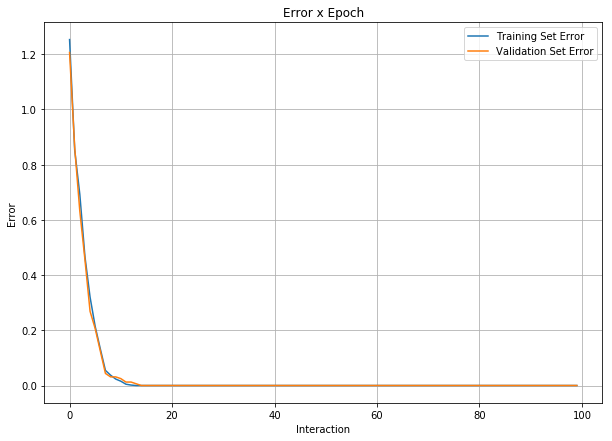

NETWORK STATE AFTER TRAINING:
 {'activation': 'linear',
 'activation_last_layer': 'linear',
 'architecture': [1],
 'autoEncode': False,
 'inputs': 3,
 'isClassification': True,
 'layers': [[{'activation': 'linear', 'bias': 0.026211476169374141, 'inputs': 3, 'newBias': 0.026211476169374141, 'newWeights': array([ 3.99978566,  1.9916391 ,  0.93851846]), 'weights': array([ 3.99978566,  1.9916391 ,  0.93851846])}]],
 'lr': 0.05,
 'momentum': 0,
 'seed': 42} 

TEST DATASET PREDICTIONS: 
y_test_true:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15) 
y_test_pred:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15)

CONFUSION MATRIX:
 [[21  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 23]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00     

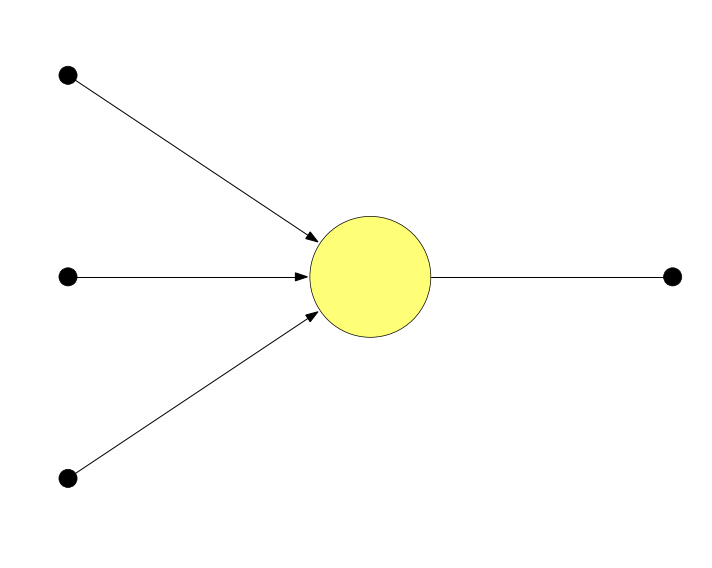

In [7]:
model = NeuralNetwork(3, [1], isClassification=True, lr=0.05, autoEncode=False, activation='linear',
                      activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=100, verbose=False, batch_size=5, plot=True)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## SOLUTION 2: 8 Perceptrons (1 layer) (batch size: 1)

TRAINING DETAILS:


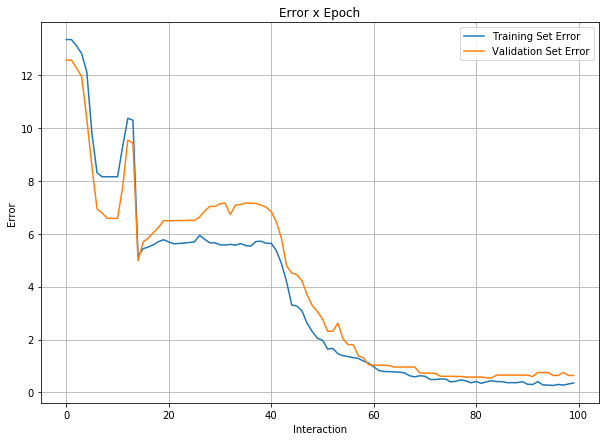

NETWORK STATE AFTER TRAINING:
 {'activation': 'relu',
 'activation_last_layer': 'relu',
 'architecture': [8],
 'autoEncode': True,
 'encoder': OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False),
 'inputs': 3,
 'isClassification': True,
 'layers': [[{'activation': 'relu', 'bias': 0.87056906570444126, 'inputs': 3, 'newBias': 0.87056906570444126, 'newWeights': array([-0.05423251,  0.12852458, -0.00603304]), 'weights': array([-0.05423251,  0.12852458, -0.00603304])},
             {'activation': 'relu', 'bias': 0.8522631818672568, 'inputs': 3, 'newBias': 0.8522631818672568, 'newWeights': array([-0.0170626 , -0.03155154,  0.15721628]), 'weights': array([-0.0170626 , -0.03155154,  0.15721628])},
             {'activation': 'relu', 'bias': 0.58723744830972702, 'inputs': 3, 'newBias': 0.58723744830972702, 'newWeights': array([-0.2236272 ,  0.43677934, -0.04893165]), 'weights': array([-0.2236272 ,  0.43677934, -0

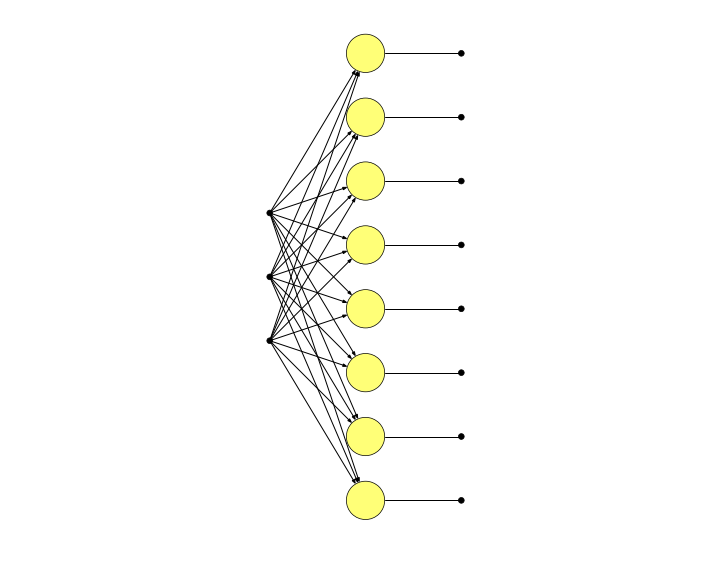

In [8]:
model = NeuralNetwork(3, [8], isClassification=True, lr=0.0001, autoEncode=True, activation='relu',
                      activation_last_layer='relu', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=100, verbose=False, plot=True, shuffle=True)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## SOLUTION 3: MLP (2 layers) (batch size: 5)

TRAINING DETAILS:


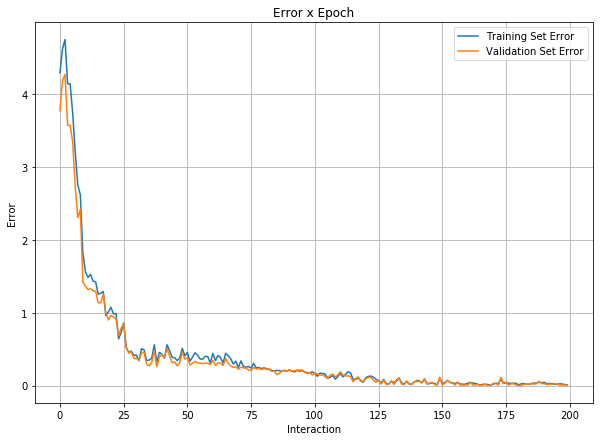

NETWORK STATE AFTER TRAINING:
 {'activation': 'sigmoid',
 'activation_last_layer': 'linear',
 'architecture': [3,
                  1],
 'autoEncode': False,
 'inputs': 3,
 'isClassification': True,
 'layers': [[{'activation': 'sigmoid', 'bias': 1.5112449085445002e-07, 'inputs': 3, 'newBias': 1.5112449085445002e-07, 'newWeights': array([ 3.12242994, -0.49321884,  0.29551734]), 'weights': array([ 3.12242994, -0.49321884,  0.29551734])},
             {'activation': 'sigmoid', 'bias': 0.037162156246491926, 'inputs': 3, 'newBias': 0.037162156246491926, 'newWeights': array([-0.46057419, -2.09488278, -0.3695861 ]), 'weights': array([-0.46057419, -2.09488278, -0.3695861 ])},
             {'activation': 'sigmoid', 'bias': 1.8740111229014013e-07, 'inputs': 3, 'newBias': 1.8740111229014013e-07, 'newWeights': array([ 2.94733017, -0.25548259,  0.25560982]), 'weights': array([ 2.94733017, -0.25548259,  0.25560982])}],
            [{'activation': 'linear', 'bias': 8.4180938286475558e-05, 'inputs': 3

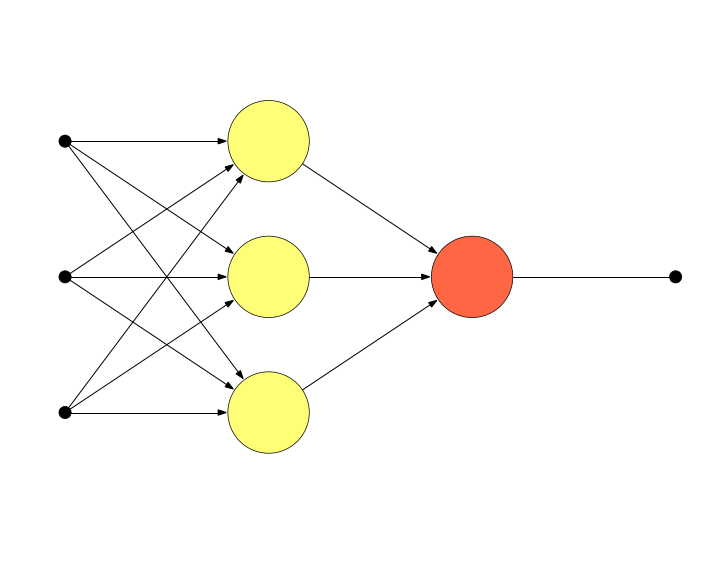

In [9]:
model = NeuralNetwork(3, [3, 1], isClassification=True, lr=0.05, autoEncode=False, activation='sigmoid',
                      activation_last_layer='linear', seed=SEED)

print("TRAINING DETAILS:")
model.fit(X=X_train, y=y_train, epochs=200, verbose=False, plot=True, batch_size=5)

print("NETWORK STATE AFTER TRAINING:\n", model, "\n")
y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = np.reshape(model.predict(X_test), (len(X_test)))

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

print("NETWORK ARCHITECTURE:")
model.draw(size=(10,8))

## SOLUTION 4: MLP Classifier implementation using sklearn (1 layer, 8 outputs) (batch size: 1)

In [10]:
clf = MLPClassifier(activation='identity', batch_size=1, shuffle=False, 
                    learning_rate='constant', max_iter=100, momentum=0, solver='sgd', nesterovs_momentum=False,
                    learning_rate_init=0.1, alpha=0, hidden_layer_sizes=(), random_state=SEED, verbose=False)

clf.fit(X_train, y_train)

print("WEIGTHS:", [coef.shape for coef in clf.coefs_], " | ", clf.coefs_)
print("LAYERS:", clf.n_layers_ )
print("BIAS VECTOR:", clf.intercepts_)

y_test_true = np.reshape(y_test, (len(y_test)))
y_test_pred = clf.predict(X_test)

print("TEST DATASET PREDICTIONS: \ny_test_true: ", y_test_true[:15]," (first 15) \ny_test_pred: ", y_test_pred[:15], " (first 15)\n")
print("CONFUSION MATRIX:\n", confusion_matrix(y_test_true, y_test_pred), "\n")
print("CLASSIFICATION REPORT:\n", classification_report(y_test_true, y_test_pred), "\n")

WEIGTHS: [(3, 8)]  |  [array([[-5.06628843, -6.38114879, -6.55361441, -7.54807195,  8.29242801,
         6.22712907,  6.09293726,  4.77736819],
       [-5.0670423 , -6.48224659,  8.28685028,  6.20743265, -6.53418232,
        -7.60919876,  6.09196785,  4.67760757],
       [-5.26208255,  8.04399205, -6.65296621,  6.01974017, -6.65307428,
         5.97583079, -7.61923597,  4.61460691]])]
LAYERS: 2
BIAS VECTOR: [array([ 7.98035732,  1.55302653,  1.5329757 , -2.63307822,  1.50739647,
       -2.58000893, -2.51656113, -5.77159506])]
TEST DATASET PREDICTIONS: 
y_test_true:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15) 
y_test_pred:  [1 1 4 4 3 6 2 1 3 0 3 4 4 5 2]  (first 15)

CONFUSION MATRIX:
 [[21  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 24  0  0  0]
 [ 0  0  0  0  0 27  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 23]] 

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       